This lesson is aimed at learners who want to try their hands on projects that further deepen their understanding of the concepts taught.  Please explore this lesson in your free time.


Walmart Sales Data Set
About Dataset
Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. They would like some insights about 45 of their stores weekly sales data. 



Content
The file walmart_weekly_sales_data.csv contains 6435 rows and 8 columns. Each row corresponds to a week in sales at Walmart. The columns are:

Store - the store number
Date - the week of sales
Weekly_Sales - sales for the given store
Holiday_Flag -  1 shows there was a holiday that week .  0 means there was no  holiday that week
Temperature - Temperature on the day of sale
Fuel_Price - Cost of fuel in the region
CPI – Prevailing consumer price index
Unemployment - Prevailing unemployment rate
Holiday Events
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Considerations
Walmart would like some insights into 45 of their stores' weekly sales data. As a data analyst you will have to use a combination of Numpy and Pandas to solve the questions they have

Note: When loading your data, parse the Date column as a date object. Use the parse_date parameter. Remember it takes a list, dictionary or boolean, so  create a list variable with the name of your date column.


Questions
1. Which store had the highest sales per week?(Store number)
- Was it a holiday week for that store?
- In which month was this week?
2. How much did they make in sales that week?
3. If weekly sales increase by 7%, what would their new sales be? (engineer a new column with an appropriate name)
4. Assuming Walmart's labour cost is 28.6% of their weekly sales, product cost is 39% and maintenance is 12.4% how much profit will each store make? (engineer new columns with appropriate name)
- Temperatures are in Fahrenheit, convert them to Celsius if you need to, using the formula below and answer the following question. ( optional: engineer a new column with an appropriate name)
- Which store had the lowest temperature (cold day)?
- Which store had the highest temperature (hot day)?
- How do the weekly sales of these stores compare in these temperature:
- Can you draw any meaning on how the weather affects Walmart's sales?
5. Which store had the highest sales week in 2012?
6. When fuel prices were above $3.50 how many stores made above $1,000,000 in weekly sales
7. How much did each store make during Christmas week in 2012?
8. How many weeks had a holiday in 2011?
9. In which week was unemployment the highest in 2012?
10. Which year was most profitable for Walmart basing profitability on the assumptions made in question 3?

In [1]:
import pandas as pd

df = pd.read_csv("data/walmart_weekly_sales_data.csv")

In [2]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df["Date"]= pd.to_datetime(df["Date"])
df["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [5]:
#Question 1
highest_weekly_sales = df["Weekly_Sales"].max()
store_highest_weekly_sales = df[(df["Weekly_Sales"] == highest_weekly_sales)]["Store"].values[0]
print(f"The store with the highest weekly sales is {store_highest_weekly_sales}")
print("It wasn't a holiday week")
print("In he month of December")

The store with the highest weekly sales is 14
It wasn't a holiday week
In he month of December


In [6]:
#Question 2
print(f"The store made {highest_weekly_sales} in sales that week")

The store made 3818686.45 in sales that week


In [7]:
#Question 3
df["Weekly_Sales_Increase(7%)"] = round(df["Weekly_Sales"] * 0.07, 2)

In [8]:
#Question 4
#Assuming Walmart's labour cost is 28.6% of their weekly sales, product cost is 39% and maintenance is 12.4% 
# how much profit will each store make? (engineer new columns with appropriate name)

df["Labour_Cost"] = round(df["Weekly_Sales"] * 0.286, 2)
df["Product_Cost"] = round(df["Weekly_Sales"] * 0.39, 2)
df["Maintenance"] = round(df["Weekly_Sales"] * 0.124, 2)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Increase(7%),Labour_Cost,Product_Cost,Maintenance
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,115058.36,470095.60,641039.45,203817.67
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,114937.02,469599.83,640363.40,203602.72
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,112837.77,461022.90,628667.59,199884.05
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,98680.93,403182.09,549793.76,174806.22
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,108836.47,444674.71,606374.61,192796.03


In [9]:
df["Temperature_in_Celcius"] = round((df["Temperature"] - 32) * 0.5556, 2)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Increase(7%),Labour_Cost,Product_Cost,Maintenance,Temperature_in_Celcius
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,115058.36,470095.60,641039.45,203817.67,5.73
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,114937.02,469599.83,640363.40,203602.72,3.62
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,112837.77,461022.90,628667.59,199884.05,4.41
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,98680.93,403182.09,549793.76,174806.22,8.13
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,108836.47,444674.71,606374.61,192796.03,8.06


In [12]:
lowest_temp = df["Temperature_in_Celcius"].min()
highest_temp = df["Temperature_in_Celcius"].max()

store_with_highest_temp = df[df["Temperature_in_Celcius"] == highest_temp]["Store"].values[0]
store_with_lowest_temp = df[df["Temperature_in_Celcius"] == lowest_temp]["Store"].values[0]

print(f"The store with the lowest temperature {lowest_temp} celcius is store {store_with_lowest_temp}") 
print(f"The store with the highest temperature {highest_temp} celcius is store {store_with_highest_temp}") 

The store with the lowest temperature -18.92 celcius is store 7
The store with the highest temperature 37.86 celcius is store 33


In [11]:
df[["Weekly_Sales", "Temperature_in_Celcius"]]

,Weekly_Sales,Temperature_in_Celcius
0,1643690.90,5.73
1,1641957.44,3.62
2,1611968.17,4.41
3,1409727.59,8.13
4,1554806.68,8.06
...,...,...
6430,713173.95,18.27
6431,733455.07,18.27
6432,734464.36,12.48
6433,718125.53,13.60


<Axes: ylabel='Frequency'>

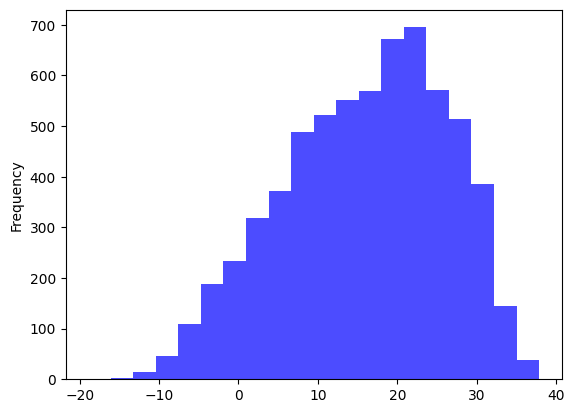

In [30]:
df["Temperature_in_Celcius"].plot(kind="hist", bins=20, color="blue", alpha=0.7)

In [ ]:
# How do the weekly sales of these stores compare in these temperatures:
print(df[df["Temperature_in_Celcius"] == highest_temp][["Temperature_in_Celcius", "Weekly_Sales"]])
print(df[df["Temperature_in_Celcius"] == lowest_temp][["Temperature_in_Celcius", "Weekly_Sales"]])

      Temperature_in_Celcius  Weekly_Sales
4599                   37.86     280937.84
     Temperature_in_Celcius  Weekly_Sales
910                  -18.92     558027.77


- Can you draw any meaning on how the weather affects Walmart's sales
Most sales during the cold weather

In [ ]:
#5. Which store had the highest sales week in 2012?

#Getthe year 2012 from the date column
df["Year"] = df["Date"].dt.year 

#Get the maximum sales for 2012 
df_2012 = df[df["Year"] == 2012]
highest_sales_2012 = df_2012["Weekly_Sales"].max()
store_highest_sales_2012 = df_2012[df_2012["Weekly_Sales"] == highest_sales_2012]["Store"].values[0]
print(f"The store with the highest sales in 2012 is {store_highest_sales_2012} with sales of {highest_sales_2012}")

The store with the highest sales in 2012 is 20 with sales of 2565259.92


In [ ]:
#6. When fuel prices were above $3.50 how many stores made above $1,000,000 in weekly sales

#Get the stores with fuel prices above $3.50
df_fuel_above_3_50 = df[df["Fuel_Price"] > 3.50]
#Get the stores with weekly sales above $1,000,000
df_sales_above_1_million = df_fuel_above_3_50[df_fuel_above_3_50["Weekly_Sales"] > 1000000]
#Get the number of stores
number_of_stores = df_sales_above_1_million["Store"].nunique()
print(f"The number of stores with fuel prices above $3.50 and weekly sales above $1,000,000 is {number_of_stores}")

The number of stores with fuel prices above $3.50 and weekly sales above $1,000,000 is 27


In [42]:
#7. How much did each store make during Christmas week in 2012?

#Get the Christmas week in 2012
df_christmas_week_2012 = df[(df["Date"] >= "2012-12-24") & (df["Date"] <= "2012-12-31")]
#Get the weekly sales for each store
df_christmas_week_2012_sales = df_christmas_week_2012.groupby("Store")["Weekly_Sales"].sum().reset_index()
#Sort the stores by weekly sales
df_christmas_week_2012_sales = df_christmas_week_2012_sales.sort_values(by="Weekly_Sales", ascending=False)

for i in range(len(df_christmas_week_2012_sales)):
    print(f"Store {df_christmas_week_2012_sales.iloc[i]['Store']} made {df_christmas_week_2012_sales.iloc[i]['Weekly_Sales']} during Christmas week in 2012")

In [47]:
#8. How many weeks had a holiday in 2011?

#Get the weeks with a holiday in 2011
df_holiday_weeks_2011 = df[(df["Date"].dt.year == 2011) & (df["Holiday_Flag"] == 1)]
#Get the number of weeks with a holiday 
df_holiday_weeks_2011_count = df_holiday_weeks_2011["Date"].nunique()
print(f"The number of weeks with a holiday in 2011 is {df_holiday_weeks_2011_count}")

The number of weeks with a holiday in 2011 is 4


In [51]:
#9. In which week was unemployment the highest in 2012?

#Get the unemployment rate for 2012
df_unemployment_2012 = df[df["Date"].dt.year == 2012]
#Get the maximum unemployment rate
highest_unemployment_rate = df_unemployment_2012["Unemployment"].max()
#Get the week with the highest unemployment rate
df_highest_unemployment_rate = df_unemployment_2012[df_unemployment_2012["Unemployment"] == highest_unemployment_rate]
#Get the date of the week with the highest unemployment rate
highest_unemployment_week = df_highest_unemployment_rate["Date"].values[0]
print(f"The week with the highest unemployment rate in 2012 was {highest_unemployment_week} with a rate of {highest_unemployment_rate}")

The week with the highest unemployment rate in 2012 was 2012-01-06T00:00:00.000000000 with a rate of 12.187


In [53]:
df["Year"].unique()

array([2010, 2011, 2012])

In [54]:
#Which year was most profitable for Walmart basing profitability on the assumptions made in question 3?

#Get the profit for each store
df["Profit"] = df["Weekly_Sales"] - df["Labour_Cost"] - df["Product_Cost"] - df["Maintenance"]
#Get the profit for each year
df_profit_by_year = df.groupby("Year")["Profit"].sum().reset_index()
#Sort the years by profit
df_profit_by_year = df_profit_by_year.sort_values(by="Profit", ascending=False)
#Get the most profitable year
most_profitable_year = df_profit_by_year.iloc[0]["Year"]
most_profitable_year_profit = df_profit_by_year.iloc[0]["Profit"]
print(f"The most profitable year for Walmart is {most_profitable_year} with a profit of {most_profitable_year_profit}")

The most profitable year for Walmart is 2011.0 with a profit of 489640001.77
